In [39]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("housing.csv", sep=r'\s+', header=None)

# Add column names manually
df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

X = df.drop("MEDV", axis=1)  
Y = df["MEDV"]               


X = np.array(X)
Y = np.array(Y)




In [89]:
def gradient_descent(x, y, epochs, lr):
    previous_cost = float("inf")
    x_scaled = (x - x.mean(axis=0)) / x.std(axis=0)
    
    n = len(y)
    w_scaled = np.zeros(x_scaled.shape[1])
    b_scaled = 0
    for i in range(epochs):
        prediction = predict(w_scaled, x_scaled, b_scaled)

        dw = - (1/n) * x_scaled.T.dot(y - prediction)
        db = -( np.mean(y - prediction))
        w_scaled = w_scaled - lr * dw
        b_scaled = b_scaled - lr * db
        current_error = cost_error(w_scaled,b_scaled,x_scaled,y)
        if previous_cost != float("inf"):
            if abs(previous_cost - current_error) / previous_cost < 1e-6:
                print("Early stopping at " , i)
                break
        
        previous_cost = current_error
    
    w_original = w_scaled / x.std(axis=0)
    b_original = b_scaled - np.sum(w_original * x.mean(axis=0))

        # Clean up near-zero values
    w_original = np.where(np.isclose(w_original, 0), 0, w_original)
    if np.isclose(b_original, 0):
        b_original = 0

    final_cost = cost_error(w_original, b_original, X, Y)
    if np.isclose(final_cost, 0):
        final_cost = 0

    
    return w_original, b_original, final_cost
    
def cost_error(w, b, x, y):
    prediction = predict(w,x, b)
    return np.mean((y - prediction) ** 2)

def predict(w,x,b):
    return x.dot(w) + b

In [183]:
w, b, error = gradient_descent(X, Y, 5000, 0.001)
prediction = predict(w, X, b)

prediction

array([30.52555338, 24.88829896, 30.83970167, 29.27959883, 28.76299762,
       25.56235967, 23.00385589, 19.91269635, 12.01133424, 19.44765576,
       19.75472517, 21.8196414 , 21.0804795 , 20.1053237 , 19.75665172,
       19.72050038, 21.11780339, 17.42750733, 16.2429644 , 18.47804339,
       12.72001436, 17.98443381, 16.44573766, 14.24029511, 16.20610231,
       13.74155133, 15.99617382, 15.37848023, 20.33333547, 21.69872479,
       12.01925911, 18.42444639,  9.65363837, 14.46015992, 14.16441647,
       22.94784872, 21.5261087 , 22.57286401, 22.54419044, 30.01397287,
       33.09939489, 28.30457518, 25.10319663, 24.61019851, 22.72176267,
       21.41165599, 19.97193506, 17.87646192,  9.03874198, 16.98050129,
       20.96860908, 23.48701177, 27.527212  , 23.70495142, 16.69808087,
       30.6632299 , 25.50072232, 31.86345208, 21.8064507 , 20.5615032 ,
       17.3993854 , 17.88185674, 23.71872572, 23.09205244, 24.91760389,
       29.3592707 , 24.33798308, 21.55789129, 17.78733864, 21.19

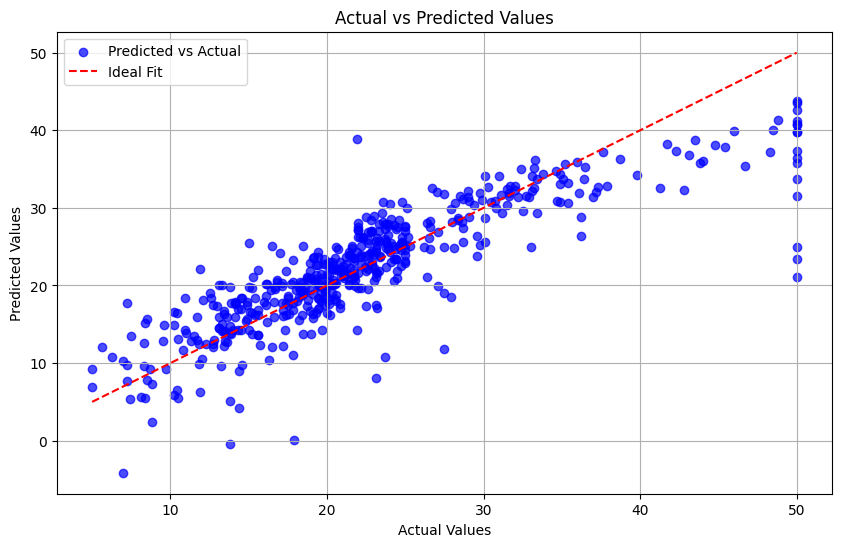

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y, prediction, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

np.float64(36.459488385089955)

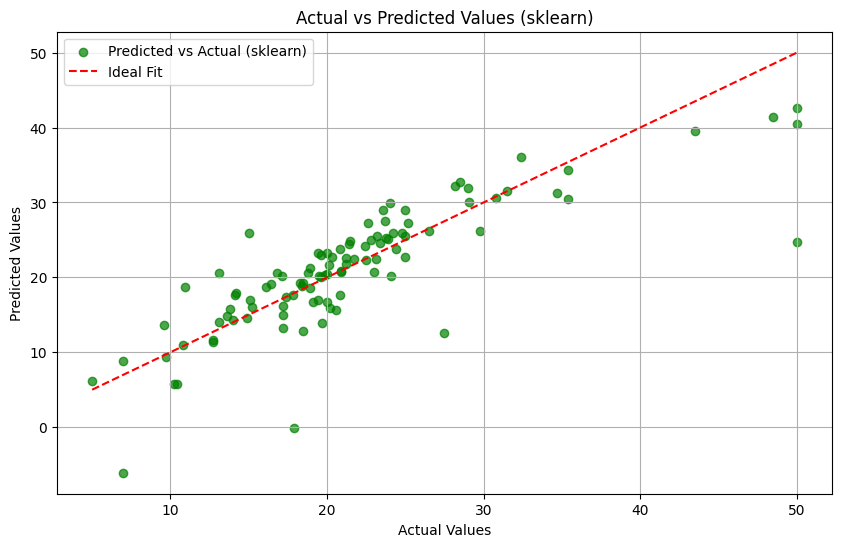

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
sklearn_predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, sklearn_predictions, alpha=0.7, color='green', label='Predicted vs Actual (sklearn)')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (sklearn)')
plt.legend()
plt.grid(True)
plt.show()